In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
telemetry = pd.read_csv("/content/Aus_Cleaned_telemetry_2024.csv")
telemetry

,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,...,jerk,speed_Delta,Braking_event,Throttle_zone,Speed_zone_all,Brake_Intensity,Braking_intensity_zone,Gear_Change,Engine_load,TB_overlap
0,NaN,0.000000,0.000,9462.374976,0.000000,1,21.00,0,1,interpolation,...,NaN,NaN,False,Medium,Slow,0.0,NaN,0,198709.8745,False
1,NaN,0.000000,0.219,9435.000000,0.000000,1,21.00,0,1,car,...,NaN,0.000000,False,Medium,Slow,0.0,NaN,0,198135.0000,False
2,NaN,0.000000,0.230,9373.399642,0.302502,1,21.00,0,1,pos,...,6.944485e+02,0.302502,False,Medium,Slow,0.0,NaN,0,196841.3925,False
3,NaN,0.000000,0.490,7917.399642,7.452502,1,21.00,0,1,pos,...,-1.709400e-04,7.150000,False,Medium,Slow,0.0,NaN,0,166265.3925,False
4,81.0,0.000000,0.619,7195.000000,11.000000,1,21.00,0,1,car,...,-2.940000e-05,3.547498,False,Medium,Slow,0.0,NaN,0,151095.0000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9066,14.0,397.893333,97.809,6981.000000,80.000000,2,73.00,0,0,pos,...,0.000000e+00,0.000000,False,High,Slow-medium,0.0,NaN,0,509613.0000,False
9067,14.0,398.568889,97.841,6994.000000,80.000000,2,73.00,0,0,car,...,0.000000e+00,0.000000,False,High,Slow-medium,0.0,NaN,0,510562.0000,False
9068,14.0,401.342222,97.969,7009.360000,79.360000,2,73.64,0,0,pos,...,-1.085069e+01,-0.640000,False,High,Slow-medium,0.0,NaN,0,516169.2704,False
9069,14.0,402.902222,98.041,7018.000000,79.000000,2,74.00,0,0,car,...,3.700000e-13,-0.360000,False,High,Slow-medium,0.0,NaN,0,519332.0000,False


In [9]:
telemetry.columns

Index(['DriverAhead', 'DistanceToDriverAhead', 'Time', 'RPM', 'Speed', 'nGear',
       'Throttle', 'Brake', 'DRS', 'Source', 'Distance', 'RelativeDistance',
       'Status', 'X', 'Y', 'Z', 'LapNumber', 'TyreLife', 'Compound', 'Stint',
       'Speed_ms', 'dt', 'Acceleration', 'jerk', 'speed_Delta',
       'Braking_event', 'Throttle_zone', 'Speed_zone_all', 'Brake_Intensity',
       'Braking_intensity_zone', 'Gear_Change', 'Engine_load', 'TB_overlap'],
      dtype='object')

In [10]:
#logic
metrics = {
    'Speed':     ['mean', 'std', 'max', 'min'],
    'speed_Delta':     ['mean', 'std', 'max', 'min'],
    'Throttle':     ['mean', 'std', 'max'],
    'Braking_event': 'sum',
    'Brake':         'mean',
    'Acceleration':  ['mean', 'max','min'],
    'jerk':          ['mean','max'],
    'Gear_Change':   'sum',
    'Time':     np.ptp  # 'ptp' stands for "peak-to-peak" (max - min) 1 being max and 0 as min
}

telemetry['LapNumber'] = telemetry['LapNumber'].astype(int)
lap_summary = telemetry.groupby('LapNumber').agg(metrics)

In [11]:
lap_summary

Speed                         speed_Delta            \
                 mean        std    max   min        mean       std   
LapNumber                                                             
1          211.836690  68.646240  306.0   0.0    0.437195  4.743281   
2          227.854822  61.042708  308.0  87.0    0.001608  4.927557   
3          227.028686  62.249109  312.0  87.0    0.019459  4.599330   
4          227.902194  63.786379  324.0  89.0   -0.024337  4.838693   
5          226.977748  61.076774  306.0  90.0    0.002864  4.814209   
6          227.230298  62.628277  305.0  91.0   -0.000628  5.068839   
7          227.962697  63.001248  306.0  87.0    0.000124  4.765825   
8          229.531260  61.228570  307.0  87.0   -0.002385  4.742746   
9          228.170221  61.895246  307.0  85.0    0.003068  5.108524   
10         226.269157  63.561441  307.0  84.0   -0.000826  5.258709   
11         227.256426  62.918188  306.0  84.0   -0.001223  4.937512   
12         225.719231  63.346221  307.0  88.0   -0.001948  4.890993   
13         226.541037  63.049629  306.0  88.0    0.001848  4.871470   
14         192.348263  87.279572  306.0   0.0   -0.283914  5.291656   

                                  Throttle                   Braking_event  \
                 max        min       mean        std    max           sum   
LapNumber                                                                    
1          20.000000 -23.000000  68.030135  40.873102  100.0             7   
2          40.162502 -28.455007  73.154966  39.514298  100.0             6   
3          18.749990 -31.000000  72.160017  39.879706  100.0             7   
4          18.000000 -35.000000  71.666981  40.542133  100.0             6   
5          15.000000 -42.034097  73.550723  38.860957  100.0             6   
6          26.021689 -39.416682  73.044466  38.789698  100.0             6   
7          13.000000 -51.000000  74.190790  39.188784  100.0             6   
8          16.220829 -29.110705  75.230773  38.031402  100.0             7   
9          27.649998 -43.000000  74.097394  38.845217  100.0             7   
10         16.362505 -42.896928  74.551403  38.314010  100.0             6   
11         13.936364 -35.810723  75.012497  37.960812  100.0             7   
12         13.440000 -30.657143  73.649062  39.007117  100.0             6   
13         19.800000 -30.789277  74.225345  38.756803  100.0             6   
14         17.416667 -58.357495  66.355862  39.407149  100.0            11   

              Brake Acceleration                             jerk  \
               mean         mean        max        min       mean   
LapNumber                                                           
1          0.179104     0.584640  20.833352 -32.986111   1.707203   
2          0.146875     0.101304  25.000025 -33.333402   5.081567   
3          0.140216     0.038768  20.833422 -43.055556  -1.265315   
4          0.156006    -0.110001  14.880974 -36.029755   0.682015   
5          0.123028     0.163507  19.675949 -37.808665   3.461632   
6          0.140549    -0.083594  19.444458 -51.587321   2.398698   
7          0.125378     0.178995  13.938726 -44.270833   5.107842   
8          0.137008    -0.070744  19.676040 -38.690511  -3.852485   
9          0.144231    -0.182926  21.701416 -51.388906  -2.231482   
10         0.138199     0.024987  19.675931 -71.180703   0.906078   
11         0.135220    -0.274930  19.347712 -46.875000 -13.385304   
12         0.124803     0.077934  20.833333 -40.895062   8.853881   
13         0.139717    -0.145845  21.825397 -45.138950  -2.135477   
14         0.183400    -0.449415  16.666667 -49.603175  -0.144733   

                       Gear_Change    Time  
                   max         sum     ptp  
LapNumber                                   
1           694.448485           6  90.038  
2          1951.327102           0  83.183  
3           659.732889           1  82.656  
4          1009.893309          -1  8

## Lap_summary why these.
#### note these are for each lap

> 1) Speed (in km/hr):
>> mean - average pace (how fast the driver generally is)

>> std - speed consistency, variation from mean speed

low std = smooth, controlled

high std = aggressive / traffic / mistakes

> 2) Throttle:
>> mean - how much throttle the driver uses on average

>> std - throttle modulation/dynamic application

low std = smooth controlled

high stf = aggressive on-off driving

> 3) Braking_event:
>> sum as these are 0 or 1 so sum = all braking events thats there.

Tells us how on-and-off driving on track during the race stint is like; Tells you: heavy traffic, defensive driving, overtaking / fighting

> 4) Brake:
>> Measures average braking intensity and patern recognition of a drivers driving style

Useful for: tyre wear analysis, late vs early brakers ,aggression profiling

> 5) Acceleration:
>> mean - overall acceleration behaviour

>> max - whats the peak acceleration the driver goes for corner_exits, straights, overstaking_spurt

> 6) Jerk:
>>Jerk measures smoothness

High jerk = harsh inputs

Low jerk = controlled, tyre-friendly driving

> 7) gear_change:
>> how many times nGear was 1 and not 0 aka gear were changed, total no of shifts

Indicates: driving aggressiveness,track layout (stop-go vs flowing)

> 8) Time:
>> TIME SPAN

Gives total duration of the Time, Works even if time doesn’t start at zero.
Max - Min of Time.



ANALYSIS BETWEEN?

1) Basic per lap Summary

2) Session maximums stats

3) Tyre life vs avg speed

4) Session stats usage frequency

5) Speed range per gear

6) RPM vs Gear vs Speed consistency check

7) Acceleration phase analysis

12) High-jerk unusual event detection wrt gear_shifts and braking_zone

13) Gear change frequency per lap

15) Engine load vs throttle

16) Coasting detection with Throttle ≈ 0 AND Brake ≈ 0

16) Source reliability check with status==on track count. get a %

17) Peak speed state snapshot

18) least speed state snapshot

In [12]:
telemetry['TyreLife'] = telemetry['TyreLife'].astype(int)
print(telemetry.groupby('TyreLife')['Speed'].mean())

print(f"max: {telemetry['Speed'].max()} and min: {[telemetry['Speed'][telemetry['Speed'] > 0].min()]}")

TyreLife
1     211.836690
2     227.854822
3     227.028686
4     227.902194
5     226.977748
6     227.230298
7     227.962697
8     229.531260
9     228.170221
10    226.269157
11    227.256426
12    225.719231
13    226.541037
14    192.348263
Name: Speed, dtype: float64
max: 324.0 and min: [0.30250176]


In [13]:
telemetry['Distance'].mean()

np.float64(2674.1226819066837)

In [14]:
telemetry['Speed_zone_all'].where(telemetry['DRS'] == 1).value_counts()

#DRS mostly appears in High_ Extreme-high zones
#Small presence in lower zones SO braking into DRS detection zones or lift before braking

,count
Speed_zone_all,
High,309
High-medium,177
Extreme-high,103
Slow-medium,92
Slow,12


In [15]:
print(telemetry['Brake'].value_counts())
print(telemetry['nGear'].value_counts())
print(telemetry['Gear_Change'].value_counts())
print(telemetry['Throttle_zone'].value_counts())
telemetry['Speed_zone_all'].value_counts()

print(telemetry['TB_overlap'].where(telemetry['Braking_event'] == 1).value_counts())

Brake
0    7761
1    1310
Name: count, dtype: int64
nGear
7    2406
6    1533
5    1407
3    1334
8    1181
4     961
2     177
1      72
Name: count, dtype: int64
Gear_Change
 0    8604
 1     263
-1     157
-2      37
-3       9
-4       1
Name: count, dtype: int64
Throttle_zone
High      6309
Low       1839
Medium     923
Name: count, dtype: int64
TB_overlap
False    70
True     24
Name: count, dtype: int64


In [16]:
telemetry['DriverAhead'] = telemetry['DriverAhead'].fillna(0).astype(int)
print(telemetry['DriverAhead'].value_counts())
print(telemetry['Braking_event'].value_counts())
print(telemetry['DRS'].value_counts())

#For wihtout ECU analysis consider 0 as DRS invalid and rest all numbers represent DRS active.

print(telemetry['Source'].value_counts())
print(telemetry['Status'].value_counts())

DriverAhead
55    7475
1     1368
0       62
14      60
18      24
44      22
81      17
3        8
16       7
63       7
77       5
10       4
31       4
11       3
20       2
27       2
23       1
Name: count, dtype: int64
Braking_event
False    8977
True       94
Name: count, dtype: int64
DRS
0     8031
1      693
14     186
8      151
10       7
2        3
Name: count, dtype: int64
Source
pos              4582
car              4461
interpolation      28
Name: count, dtype: int64
Status
OnTrack    9071
Name: count, dtype: int64


In [17]:
print(telemetry.groupby('Gear_Change')['Speed_zone_all'].min())
print(telemetry.groupby('Gear_Change')['Speed_zone_all'].max())

Gear_Change
-4     High-medium
-3     High-medium
-2            High
-1            High
 0    Extreme-high
 1    Extreme-high
Name: Speed_zone_all, dtype: object
Gear_Change
-4    High-medium
-3    High-medium
-2    Slow-medium
-1    Slow-medium
 0    Slow-medium
 1    Slow-medium
Name: Speed_zone_all, dtype: object


In [18]:
print(telemetry.groupby('Gear_Change')['RPM'].mean())

Gear_Change
-4     9243.000000
-3    10221.777778
-2    10296.243243
-1    10772.872611
 0    10514.799431
 1    10475.836502
Name: RPM, dtype: float64


In [19]:
print(telemetry.groupby('Gear_Change')['Speed'].mean())

Gear_Change
-4    142.000000
-3    162.000000
-2    164.621622
-1    204.636943
 0    224.000977
 1    223.520913
Name: Speed, dtype: float64


In [20]:
telemetry['Braking_intensity_zone'].value_counts()

,count
Braking_intensity_zone,
Mid,831
Low,673
High,43


In [21]:
print(f"{telemetry['Acceleration'].min()} and {telemetry['Acceleration'].max()}")

telemetry['Acceleration_Sign'] = np.where(
    telemetry['Acceleration'] > 0, 'Positive',
    np.where(telemetry['Acceleration'] < 0, 'Negative', 'Zero')
)
print(telemetry['Acceleration_Sign'].value_counts())

-71.18070251 and 25.00002462
Acceleration_Sign
Positive    5480
Negative    2574
Zero        1017
Name: count, dtype: int64


In [22]:
print(f"{telemetry['jerk'].min()} and {telemetry['jerk'].max()}")

#_ve jerking means jerk when acce was -ve aka speed was decreasing as jerk = acc/dt only

telemetry['jerk_Sign'] = np.where(
    telemetry['jerk'] > 0, 'Positive',
    np.where(telemetry['jerk'] < 0, 'Negative', 'Zero')
)
print(telemetry['jerk_Sign'].value_counts())

-3306.849304 and 3428.819444
jerk_Sign
Positive    4249
Negative    4157
Zero         665
Name: count, dtype: int64


In [23]:
jerk_data = telemetry.groupby(['jerk_Sign', 'Gear_Change', 'Braking_intensity_zone'])['Speed_zone_all'].value_counts()
print(jerk_data)

jerk_Sign  Gear_Change  Braking_intensity_zone  Speed_zone_all
Negative   -4           Low                     High-medium         1
           -3           Mid                     High-medium         4
           -2           Mid                     High-medium        14
                                                High                2
                                                Slow-medium         2
           -1           High                    High-medium         3
                                                High                2
                        Low                     High                9
                                                High-medium         3
                        Mid                     High               35
                                                High-medium        34
                                                Slow-medium         3
            0           High                    High               26
                           

In [24]:
print(telemetry.groupby('LapNumber')['Gear_Change'].sum())

LapNumber
1     6
2     0
3     1
4    -1
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14   -5
Name: Gear_Change, dtype: int64


In [25]:
print(f"{telemetry['Engine_load'].min()} and {telemetry['Engine_load'].max()} and {telemetry['Engine_load'].mean()}")
print(telemetry.groupby('Throttle_zone')['Engine_load'].std())

0.0 and 1259478.0 and 787702.1531382813
Throttle_zone
High      108529.127434
Low        43108.161405
Medium    161442.037644
Name: Engine_load, dtype: float64


In [26]:
for x in telemetry['LapNumber'].unique():
  coasting_dect = (telemetry['Brake'] < 1) & (telemetry['Throttle'] < 1)
  print(f" {x} -> {coasting_dect.value_counts()}")
coasting_dect.value_counts()

 1 -> False    8843
True      228
Name: count, dtype: int64
 2 -> False    8843
True      228
Name: count, dtype: int64
 3 -> False    8843
True      228
Name: count, dtype: int64
 4 -> False    8843
True      228
Name: count, dtype: int64
 5 -> False    8843
True      228
Name: count, dtype: int64
 6 -> False    8843
True      228
Name: count, dtype: int64
 7 -> False    8843
True      228
Name: count, dtype: int64
 8 -> False    8843
True      228
Name: count, dtype: int64
 9 -> False    8843
True      228
Name: count, dtype: int64
 10 -> False    8843
True      228
Name: count, dtype: int64
 11 -> False    8843
True      228
Name: count, dtype: int64
 12 -> False    8843
True      228
Name: count, dtype: int64
 13 -> False    8843
True      228
Name: count, dtype: int64
 14 -> False    8843
True      228
Name: count, dtype: int64


,count
False,8843
True,228


In [27]:
telemetry.columns

Index(['DriverAhead', 'DistanceToDriverAhead', 'Time', 'RPM', 'Speed', 'nGear',
       'Throttle', 'Brake', 'DRS', 'Source', 'Distance', 'RelativeDistance',
       'Status', 'X', 'Y', 'Z', 'LapNumber', 'TyreLife', 'Compound', 'Stint',
       'Speed_ms', 'dt', 'Acceleration', 'jerk', 'speed_Delta',
       'Braking_event', 'Throttle_zone', 'Speed_zone_all', 'Brake_Intensity',
       'Braking_intensity_zone', 'Gear_Change', 'Engine_load', 'TB_overlap',
       'Acceleration_Sign', 'jerk_Sign'],
      dtype='object')

In [28]:
dt_max = telemetry[telemetry['dt'] == telemetry['dt'].max()]
dt_max

,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,...,Braking_event,Throttle_zone,Speed_zone_all,Brake_Intensity,Braking_intensity_zone,Gear_Change,Engine_load,TB_overlap,Acceleration_Sign,jerk_Sign
615,55,60.850001,82.591,9865.254428,159.404372,3,70.361436,0,1,pos,...,False,High,High-medium,0.0,NaN,0,694133.4646,False,Positive,Positive


In [29]:
speed_max = telemetry[telemetry['Speed'] == telemetry['Speed'].max()]
speed_max

,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,...,Braking_event,Throttle_zone,Speed_zone_all,Brake_Intensity,Braking_intensity_zone,Gear_Change,Engine_load,TB_overlap,Acceleration_Sign,jerk_Sign
2309,1,55.903333,44.944,11418.0,324.0,8,99.0,0,14,car,...,False,High,Extreme-high,0.0,NaN,0,1130382.0,False,Positive,Positive


In [30]:
distance_max = telemetry[telemetry['Distance'] == telemetry['Distance'].max()]
distance_max

,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,...,Braking_event,Throttle_zone,Speed_zone_all,Brake_Intensity,Braking_intensity_zone,Gear_Change,Engine_load,TB_overlap,Acceleration_Sign,jerk_Sign
669,55,106.153056,90.038,11677.39169,292.483334,7,99.0,0,1,interpolation,...,False,High,Extreme-high,0.0,NaN,0,1156061.777,False,Positive,Positive


In [31]:
throttle_max = telemetry[telemetry['Throttle'] == telemetry['Throttle'].max()]
throttle_max.head(1)

,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,...,Braking_event,Throttle_zone,Speed_zone_all,Brake_Intensity,Braking_intensity_zone,Gear_Change,Engine_load,TB_overlap,Acceleration_Sign,jerk_Sign
339,55,66.129722,44.42,11420.0,285.0,7,100.0,0,1,car,...,False,High,High,0.0,NaN,0,1142000.0,False,Positive,Negative


In [32]:
brake_max = telemetry[telemetry['Brake_Intensity'] == telemetry['Brake_Intensity'].max()]
brake_max.head(1)

,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,...,Braking_event,Throttle_zone,Speed_zone_all,Brake_Intensity,Braking_intensity_zone,Gear_Change,Engine_load,TB_overlap,Acceleration_Sign,jerk_Sign
2328,1,38.784722,47.583,11591.0,270.0,7,0.0,1,8,car,...,True,Low,High,22.727253,Mid,-1,0.0,False,Negative,Positive


In [33]:
jerk_max = telemetry[telemetry['jerk'] == telemetry['jerk'].max()]
jerk_max.head(1)

,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,...,Braking_event,Throttle_zone,Speed_zone_all,Brake_Intensity,Braking_intensity_zone,Gear_Change,Engine_load,TB_overlap,Acceleration_Sign,jerk_Sign
7516,55,246.2525,60.056,9228.9,134.75,3,0.0,1,0,pos,...,False,Low,High-medium,0.0,Low,0,0.0,False,Negative,Positive


In [34]:
engine_load_max = telemetry[telemetry['Engine_load'] == telemetry['Engine_load'].max()]
engine_load_max.head(1)

,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,...,Braking_event,Throttle_zone,Speed_zone_all,Brake_Intensity,Braking_intensity_zone,Gear_Change,Engine_load,TB_overlap,Acceleration_Sign,jerk_Sign
1174,1,58.013056,65.262,12722.0,209.0,4,99.0,0,0,car,...,False,High,High-medium,0.0,NaN,0,1259478.0,False,Positive,Negative


In [35]:
TB_overlap_max = telemetry[telemetry['TB_overlap'] == telemetry['TB_overlap'].max()]
TB_overlap_max.head(1)

,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,...,Braking_event,Throttle_zone,Speed_zone_all,Brake_Intensity,Braking_intensity_zone,Gear_Change,Engine_load,TB_overlap,Acceleration_Sign,jerk_Sign
53,44,1.258889,7.099,10245.0,240.0,6,19.0,1,1,car,...,True,Low,High,0.0,NaN,0,194655.0,True,Positive,Negative


In [36]:
gear_change_max = telemetry[telemetry['Gear_Change'] == telemetry['Gear_Change'].max()]
gear_change_max.head(1)

,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,...,Braking_event,Throttle_zone,Speed_zone_all,Brake_Intensity,Braking_intensity_zone,Gear_Change,Engine_load,TB_overlap,Acceleration_Sign,jerk_Sign
22,44,1.969722,3.14,10463.0,110.0,2,84.0,0,1,car,...,False,High,Slow-medium,0.0,NaN,1,878892.0,False,Positive,Negative


In [37]:
gear_change_min = telemetry[telemetry['Gear_Change'] == telemetry['Gear_Change'][telemetry['Gear_Change'] > 0].min()]
gear_change_min.head(1)

,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,...,Braking_event,Throttle_zone,Speed_zone_all,Brake_Intensity,Braking_intensity_zone,Gear_Change,Engine_load,TB_overlap,Acceleration_Sign,jerk_Sign
22,44,1.969722,3.14,10463.0,110.0,2,84.0,0,1,car,...,False,High,Slow-medium,0.0,NaN,1,878892.0,False,Positive,Negative


In [38]:
dt_min = telemetry[telemetry['dt'] == telemetry['dt'][telemetry['dt'] > 0].min()]
dt_min.head(1)


,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,...,Braking_event,Throttle_zone,Speed_zone_all,Brake_Intensity,Braking_intensity_zone,Gear_Change,Engine_load,TB_overlap,Acceleration_Sign,jerk_Sign
4514,55,197.551111,82.744,11691.29997,292.049999,7,99.0,0,0,interpolation,...,False,High,Extreme-high,0.0,NaN,0,1157438.697,False,Positive,Positive


In [39]:
throttle_min = telemetry[telemetry['Throttle'] == telemetry['Throttle'][telemetry['Throttle'] > 0].min()]
throttle_min.head(1)


,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,...,Braking_event,Throttle_zone,Speed_zone_all,Brake_Intensity,Braking_intensity_zone,Gear_Change,Engine_load,TB_overlap,Acceleration_Sign,jerk_Sign
6457,55,248.953332,4.672,10190.24508,172.775002,4,0.045,0,0,pos,...,False,Low,High-medium,0.0,Low,0,458.557768,False,Negative,Negative


In [40]:
speed_min = telemetry[
    telemetry['Speed'] == telemetry['Speed'][telemetry['Speed'] > 0].min()
]
speed_min.head(1)



,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,...,Braking_event,Throttle_zone,Speed_zone_all,Brake_Intensity,Braking_intensity_zone,Gear_Change,Engine_load,TB_overlap,Acceleration_Sign,jerk_Sign
2,0,0.0,0.23,9373.399642,0.302502,1,21.0,0,1,pos,...,False,Medium,Slow,0.0,NaN,0,196841.3925,False,Positive,Positive


In [41]:
dist_ahead_min = telemetry[
    telemetry['DistanceToDriverAhead'] == telemetry['DistanceToDriverAhead'][telemetry['DistanceToDriverAhead'] > 0].min()
]
dist_ahead_min.head(1)


,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,...,Braking_event,Throttle_zone,Speed_zone_all,Brake_Intensity,Braking_intensity_zone,Gear_Change,Engine_load,TB_overlap,Acceleration_Sign,jerk_Sign
188,18,0.006389,24.66,9616.0,102.0,2,61.0,0,1,car,...,False,Medium,Slow-medium,0.0,NaN,0,586576.0,False,Positive,Negative


DV :-

Speed distribution per lap (BOXPLOT)

Speed vs TyreLife (LINE)

Throttle vs Speed (SCATTER)

Gear vs Speed (BOXPLOT)

RPM vs Gear (BOXPLOT)

Jerk distribution (HISTOGRAM)

Engine load vs Throttle (SCATTER)

Acceleration vs Time

HeatMap Correlation

DriverAhead vs Our Driver — LIVE TRACING STYLE LINE

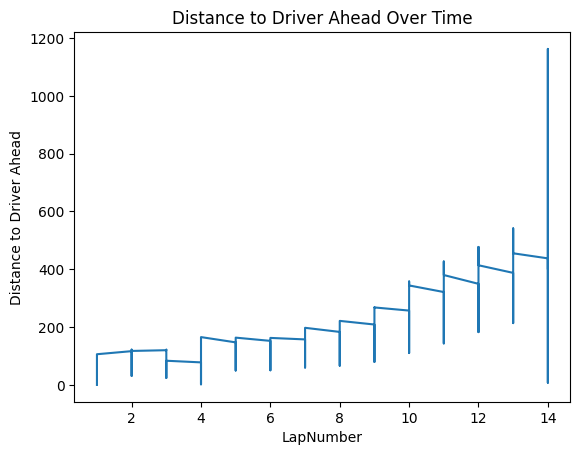

In [42]:
# Line plot gives a proximity comparison
# Shows how closely the driver follows others during the lap
plt.plot(telemetry['LapNumber'], telemetry['DistanceToDriverAhead'])
plt.title("Distance to Driver Ahead Over Time")
plt.xlabel("LapNumber")
plt.ylabel("Distance to Driver Ahead")
plt.show()


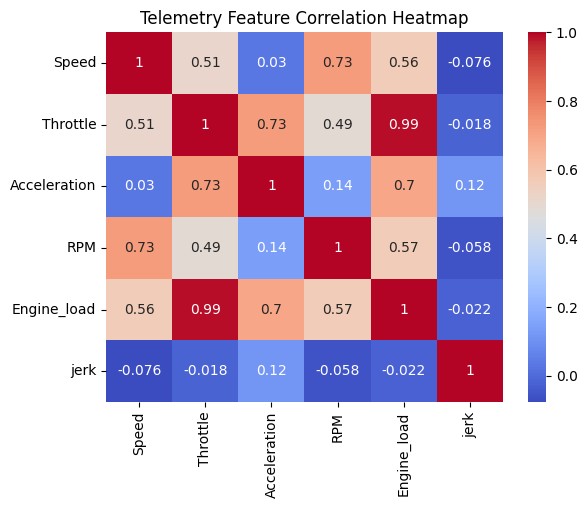

In [43]:
# Heatmap is used to detect many inter-metric relationships at once
# Shows which telemetry variables move together or oppose each other
corr = telemetry[['Speed','Throttle','Acceleration','RPM','Engine_load','jerk']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Telemetry Feature Correlation Heatmap")
plt.show()

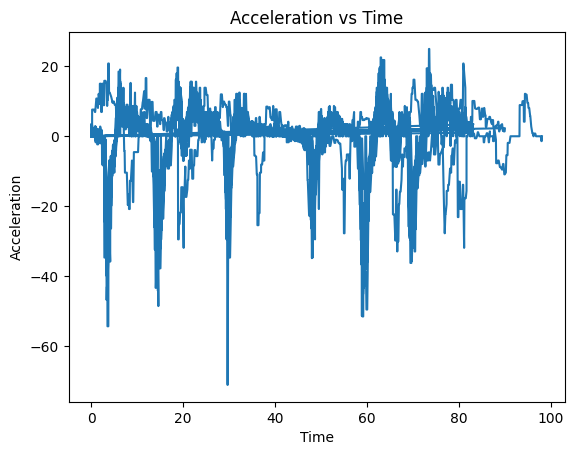

In [44]:
# Line plot captures dynamic change over continuous time
# Shows braking zones, acceleration phases, and stability
plt.plot(telemetry['Time'], telemetry['Acceleration'])
plt.title("Acceleration vs Time")
plt.xlabel("Time")
plt.ylabel("Acceleration")
plt.show()

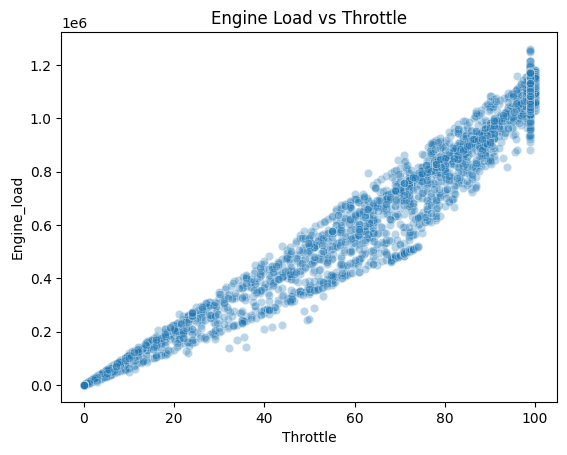

In [45]:
# Scatter highlights mechanical response beyond driver input
# Shows how engine load scales with throttle application
sns.scatterplot(x='Throttle', y='Engine_load', data=telemetry, alpha=0.3)
plt.title("Engine Load vs Throttle")
plt.show()

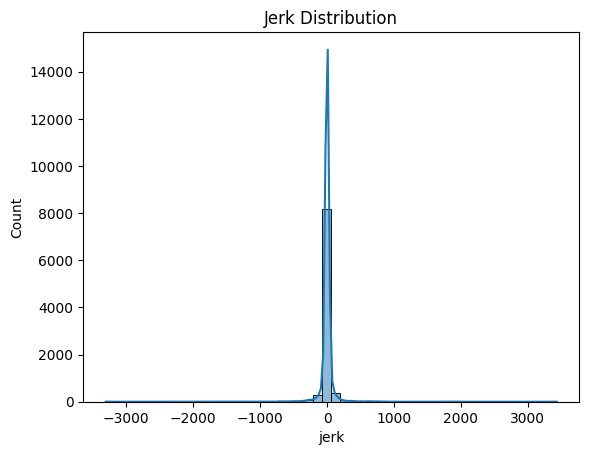

In [46]:
# Histogram is best for distribution shape and extremes
# Shows driving smoothness vs aggressive input behaviour
sns.histplot(telemetry['jerk'], bins=50, kde=True)
plt.title("Jerk Distribution")
plt.show()

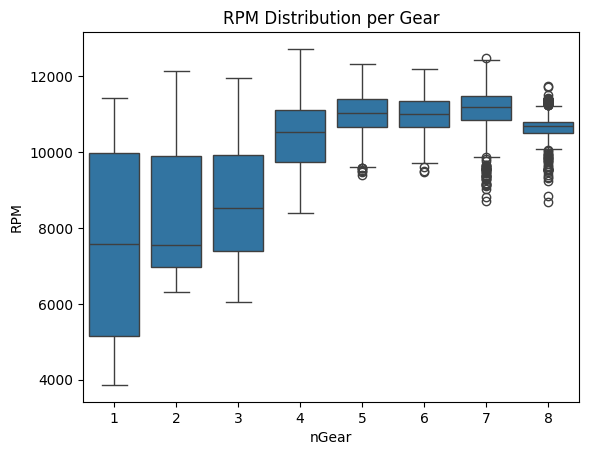

In [47]:
# Boxplot captures RPM spread and consistency per gear
# Shows how well the engine stays within optimal power band
sns.boxplot(x='nGear', y='RPM', data=telemetry)
plt.title("RPM Distribution per Gear")
plt.show()

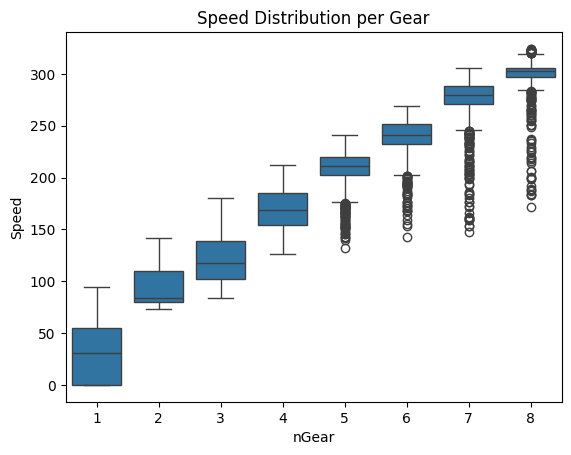

In [48]:
# Boxplot suits discrete gears with continuous speed values
# Validates speed operating range per gear
sns.boxplot(x='nGear', y='Speed', data=telemetry)
plt.title("Speed Distribution per Gear")
plt.show()


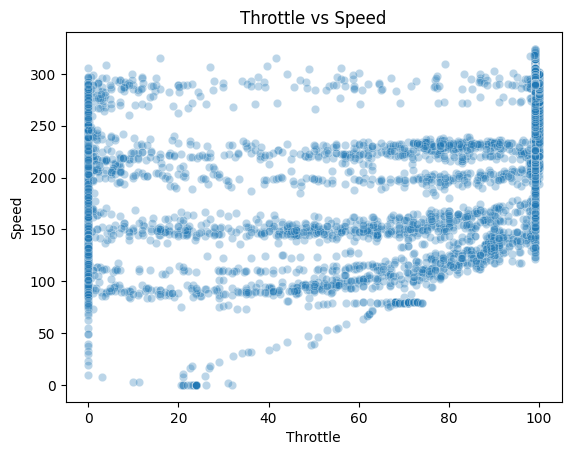

In [49]:
# Scatter reveals non-linear driver input vs vehicle response
# Shows throttle application patterns across speed ranges
sns.scatterplot(x='Throttle', y='Speed', data=telemetry, alpha=0.3)
plt.title("Throttle vs Speed")
plt.show()

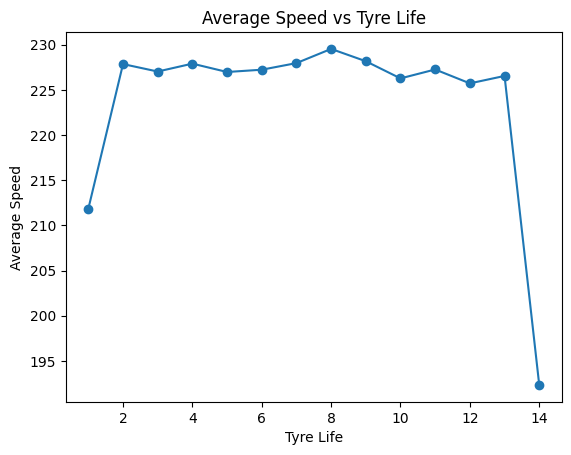

In [50]:
# Line plot is ideal for degradation trends over time
# Shows how average pace changes as tyres age
telemetry.groupby('TyreLife')['Speed'].mean().plot(marker='o')
plt.title("Average Speed vs Tyre Life")
plt.xlabel("Tyre Life")
plt.ylabel("Average Speed")
plt.show()

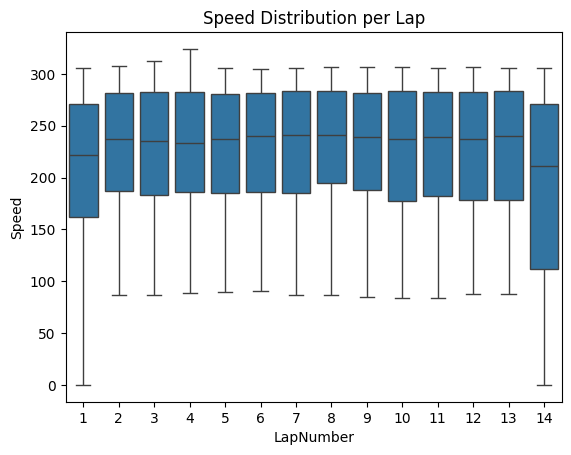

In [51]:
# Boxplot chosen to capture spread + outliers, not just averages
# Shows lap-wise pace consistency and anomalies
sns.boxplot(x='LapNumber', y='Speed', data=telemetry)
plt.title("Speed Distribution per Lap")
plt.show()

Text(0.5, 1.0, 'Racing Line Comparison: First Lap vs Last Lap')

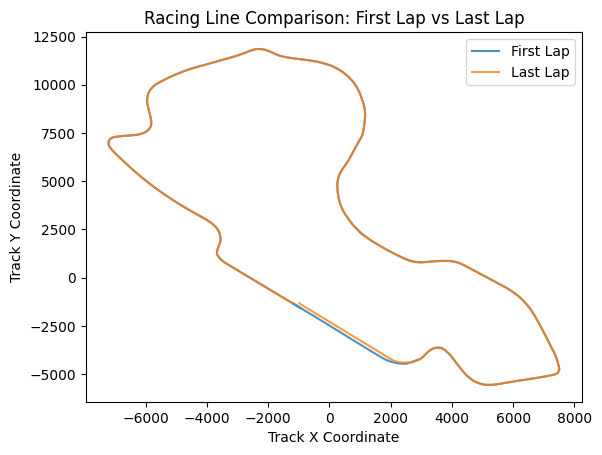

In [52]:
# Extract first and last lap numbers
first_lap = telemetry['LapNumber'].min()
last_lap = telemetry['LapNumber'].max()

lap1 = telemetry[telemetry['LapNumber'] == first_lap]
lapN = telemetry[telemetry['LapNumber'] == last_lap]

# Plot racing line using X-Y coordinates
plt.plot(lap1['X'], lap1['Y'], label='First Lap', alpha=0.8)
plt.plot(lapN['X'], lapN['Y'], label='Last Lap', alpha=0.8)

plt.legend()
plt.xlabel("Track X Coordinate")
plt.ylabel("Track Y Coordinate")
plt.title("Racing Line Comparison: First Lap vs Last Lap")

# WHY line plot:
# X-Y coordinates represent actual on-track path, so line plot best captures racing line.

# WHAT it shows:
# Differences between first and last lap racing lines highlight pace evolution, confidence, and line optimization.
